# Network (base on user mentioned column)

In this notebook, we will investigate the network of politicians based on who mentioned whom in tweets.

## 1. Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.colors as mcolors

## 2. Reading data

In [14]:
df = pd.read_parquet('cleaned_data/df_combined.parquet')

In [15]:
df.head()

,in_reply_to_user_id,reply_settings,author_id,context_annotations,id,text,edit_controls,referenced_tweets,created_at,edit_history_tweet_ids,...,links,hashtags,retweet_count,reply_count,like_count,quote_count,impression_count,text_clean_en,text_clean_en_demojized,name
0,375146901.0,everyone,1.182212e+09,[{'domain': {'description': 'Named people in t...,1846277256509116672,"@donaldtusk Niezrealizowanie większości ze ""10...",{'editable_until': '2024-10-15 20:49:34+00:00'...,"[{'id': '1846091776269963695', 'type': 'replie...",2024-10-15 19:49:34+00:00,[1846277256509116623],...,[],[],3,1,33,0,1555,"Failure to implement most of the ""100 specifi...","Failure to implement most of the ""100 specifi...",Bartłomiej Pejo
1,NaN,everyone,1.182212e+09,[{'domain': {'description': 'Named people in t...,1846222583898784000,Rok po wyborach trzeba powiedzieć jedno - nie ...,{'editable_until': '2024-10-15 17:12:19+00:00'...,None,2024-10-15 16:12:19+00:00,[1846222583898784025],...,[https://t.co/4Jh5Ni6sgr],[],9,2,72,0,3031,"A year after the elections, one thing must be ...","A year after the elections, one thing must be ...",Bartłomiej Pejo
2,NaN,everyone,1.182212e+09,None,1846161400328028160,"❌ Mamy rok po wyborach, a Polska pogrąża się ...",{'editable_until': '2024-10-15 13:09:12+00:00'...,None,2024-10-15 12:09:12+00:00,[1846161400328028272],...,"[https://t.co/zFk5QLd1em, https://t.co/bRV4y07...",[],4,3,33,2,8636,"❌ We are a year after the elections, and Pola...",:cross_mark: We are a year after the election...,Bartłomiej Pejo
3,NaN,everyone,1.182212e+09,None,1846091824101769472,Mija rok od wyborów parlamentarnych. W kampani...,{'editable_until': '2024-10-15 08:32:44+00:00'...,None,2024-10-15 07:32:44+00:00,[1846091824101769490],...,"[https://t.co/rtVu3Bh43G, https://t.co/8Q3LME6...",[],6,2,38,0,2441,A year has passed since the parliamentary elec...,A year has passed since the parliamentary elec...,Bartłomiej Pejo
4,NaN,everyone,1.182212e+09,None,1846075343188144128,#Idę11 🇵 🇱 https://t.co/KiCe5ATOpX,{'editable_until': '2024-10-15 07:27:14+00:00'...,None,2024-10-15 06:27:14+00:00,[1846075343188144153],...,[https://t.co/KiCe5ATOpX],[#Idę11],45,18,616,2,8634,#I'm going11 🇵 🇱,#I'm going11 🇵 🇱,Bartłomiej Pejo


In [16]:
# Extracting the columns we are interested in
df = df[['name','username','party','mentions']].copy()
df.head()

,name,username,party,mentions
0,Bartłomiej Pejo,bartlomiejpejo,Konfederacja,[@donaldtusk]
1,Bartłomiej Pejo,bartlomiejpejo,Konfederacja,[]
2,Bartłomiej Pejo,bartlomiejpejo,Konfederacja,[]
3,Bartłomiej Pejo,bartlomiejpejo,Konfederacja,[]
4,Bartłomiej Pejo,bartlomiejpejo,Konfederacja,[]


In [17]:
# Minor cleaning of deleting the @ symbol from the mentions
df['mentions'] = df['mentions'].apply(lambda x: [mention[1:] if mention.startswith('@') else mention for mention in x])

## 3. Network analysis

### 3.1. Most mentioned Users

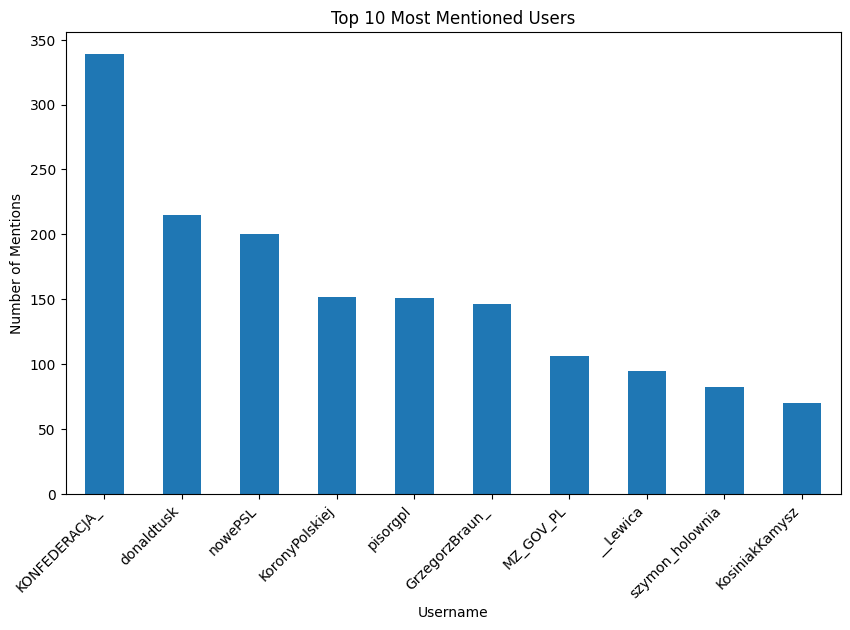

In [18]:
# Explode the mentions column to have one mention per row
mentions_exploded = df.explode('mentions')
# Count the occurrences of each mention
mention_counts = mentions_exploded['mentions'].value_counts().head(10)
# Plot the top 10 most mentioned users
mention_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Most Mentioned Users')
plt.xlabel('Username')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45, ha='right')
plt.show()

We can observe that the highest number of mentions are attributed to political parties. However, notable individuals such as Donald Tusk, Grzegorz Braun, Ministerstwo Spraw Zagranicznych, Szymon Hołownia, and Władysław Kosiniak-Kamysz are also frequently mentioned.

### 3.2. Most mentioned Users for each Party

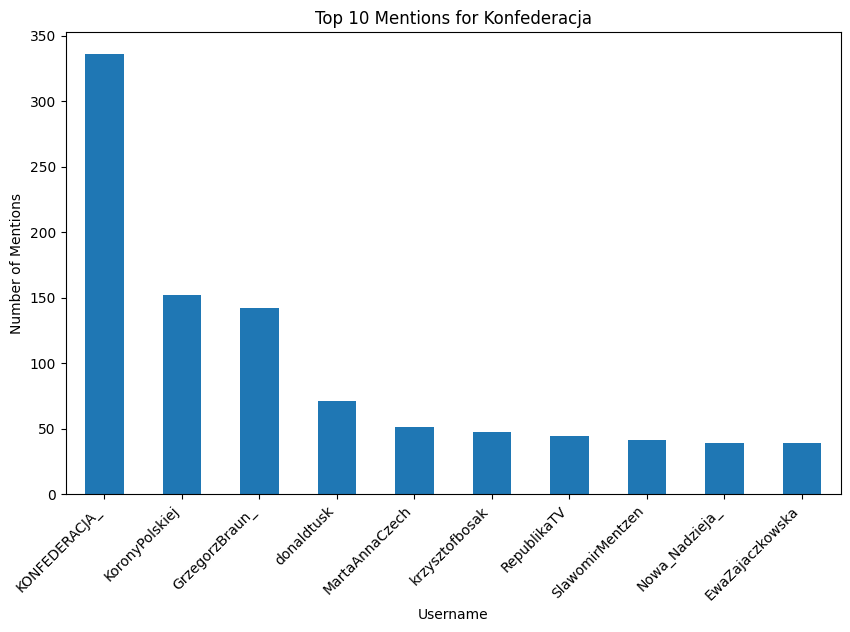

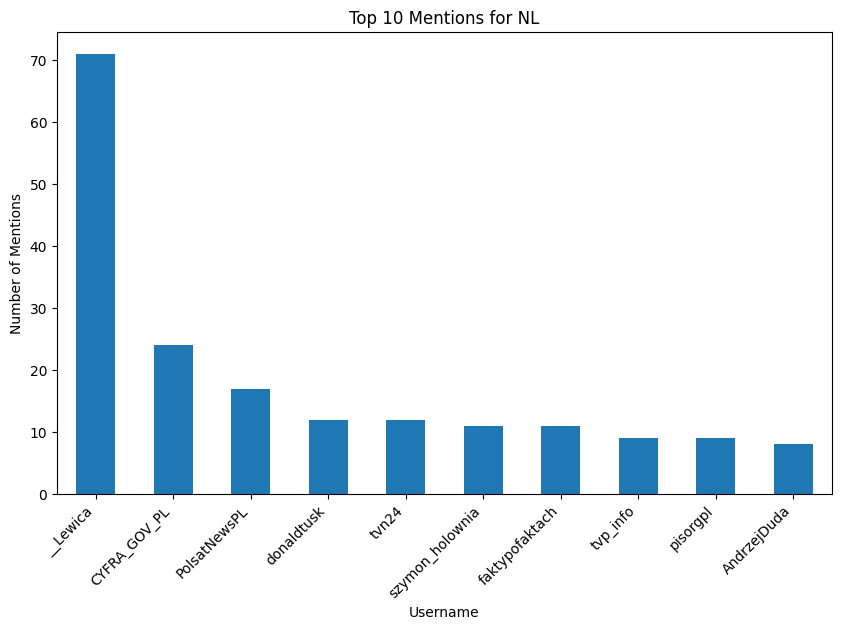

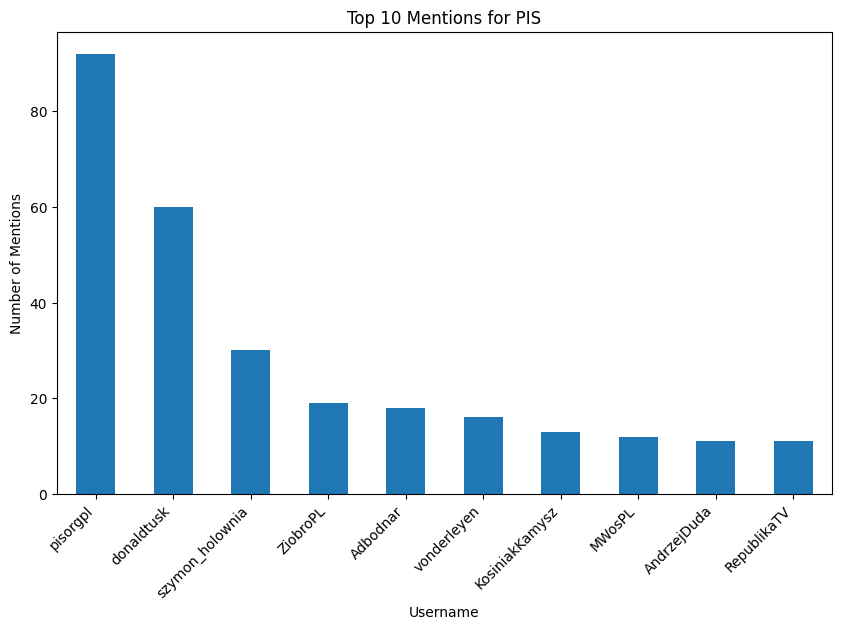

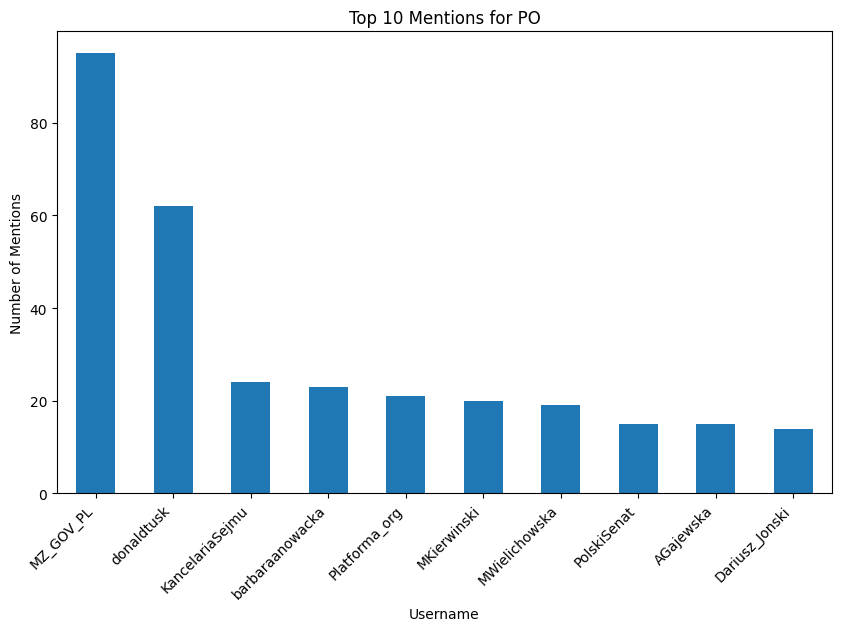

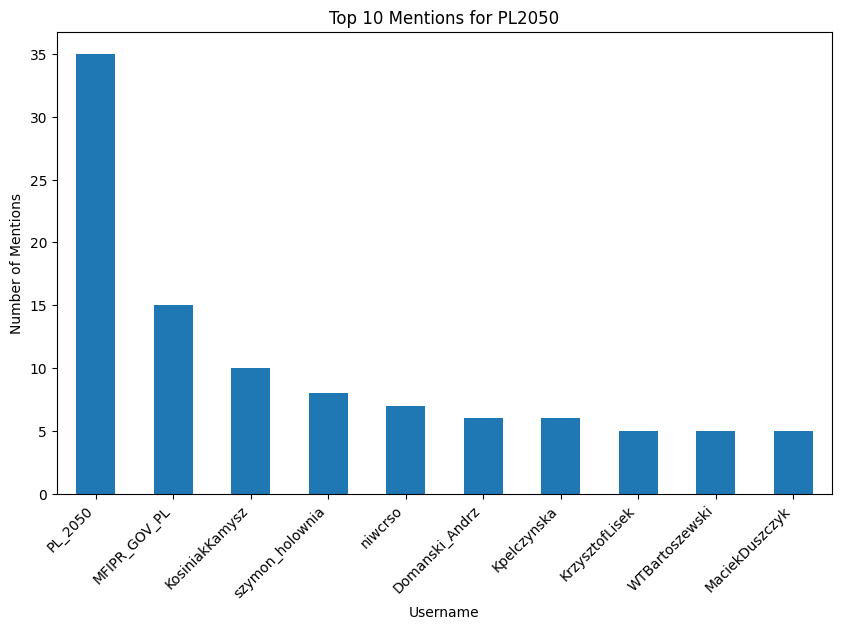

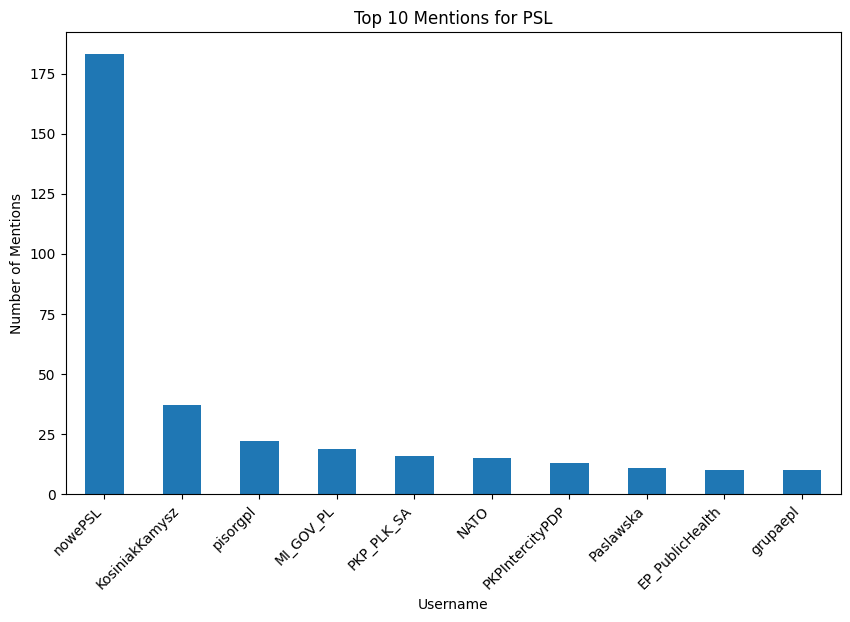

In [19]:
# Group by party and explode the mentions column
party_mentions_exploded = df.explode('mentions').dropna(subset=['mentions'])

# Create a plot for each party
parties = party_mentions_exploded['party'].unique()
for party in parties:
    party_df = party_mentions_exploded[party_mentions_exploded['party'] == party]
    mention_counts_party = party_df['mentions'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    mention_counts_party.plot(kind='bar')
    plt.title(f'Top 10 Mentions for {party}')
    plt.xlabel('Username')
    plt.ylabel('Number of Mentions')
    plt.xticks(rotation=45, ha='right')
    plt.show()

For politicians from the Konfederacja coalition, we observe that apart from their political parties and members, they frequently mention Donald Tusk and RepublikaTV.

For Nowa Lewica politicians, apart from their political parties and members, they often mention TV stations, the Ministry of Digital Affairs, Andrzej Duda, the opposing political party PIS, and again, Donald Tusk.

For Prawo i Sprawiedliwość, they frequently mention people from other parties such as Donald Tusk, Szymon Hołownia, Prosecutor General Adam Bodnar, Władysław Kosiniak-Kamysz, and even an international figure, Ursula von der Leyen.

For Platforma Obywatelska, apart from the Ministry of Foreign Affairs and the Chancellery of the Sejm and Senate of Poland, they mainly mention their own members.

For Polska2050, they mention Władysław Kosiniak-Kamysz, the National Institute of Freedom - Center for Civil Society Development, Andrzej Domański, Krzysztof Lisek, and Władysław T. Bartoszewski.

For Polskie Stronnictwo Ludowe, they mention PIS, Polish Railways, NATO, European Public Health, and the EPP Group.

Overall, we observe that different political parties mention different people and organizations in their tweets. Some parties, like Konfederacja and PO, mostly mention their own members in the top 10 mentions. In contrast, other parties like NL, PIS, and PL2050 frequently mention people from other parties. Additionally, PSL includes organizations like Polish Railways, NATO, and European Public Health in their top 10 mentions.


## 4. Graph Network

#### 4.1. General

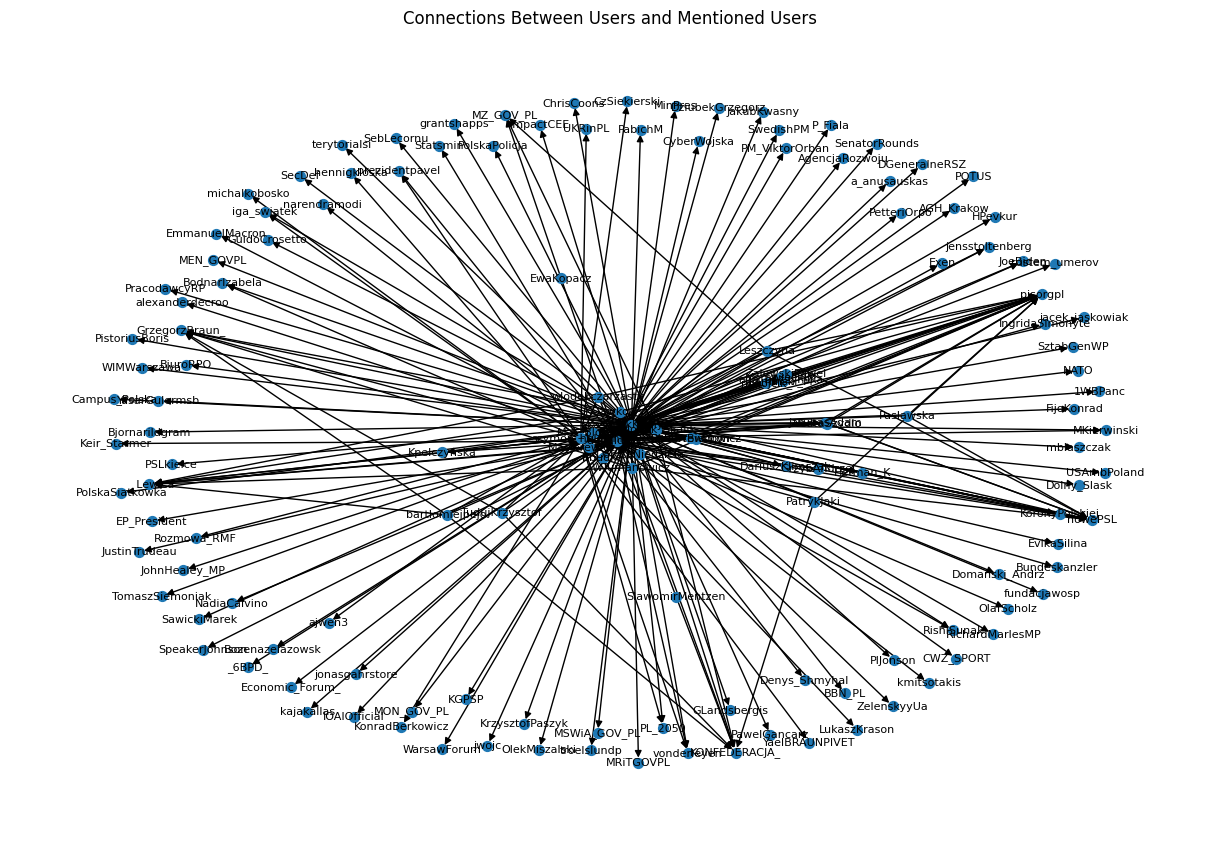

In [20]:
nodes_to_keep = list(mention_counts.head(50).index)
mentions_exploded_1 = mentions_exploded[mentions_exploded['username'].isin(nodes_to_keep) | mentions_exploded['mentions'].isin(nodes_to_keep)]
G = nx.DiGraph()

for _, row in mentions_exploded_1.dropna(subset=['mentions']).iterrows():
    G.add_edge(row['username'], row['mentions'])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.1)
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, arrowsize=10)
plt.title('Connections Between Users and Mentioned Users')
plt.show()

From the graph above, it is challenging to draw any concrete conclusions. Let's narrow our focus to the politicians whose tweets were downloaded.

#### 4.2. Analysed Politicians

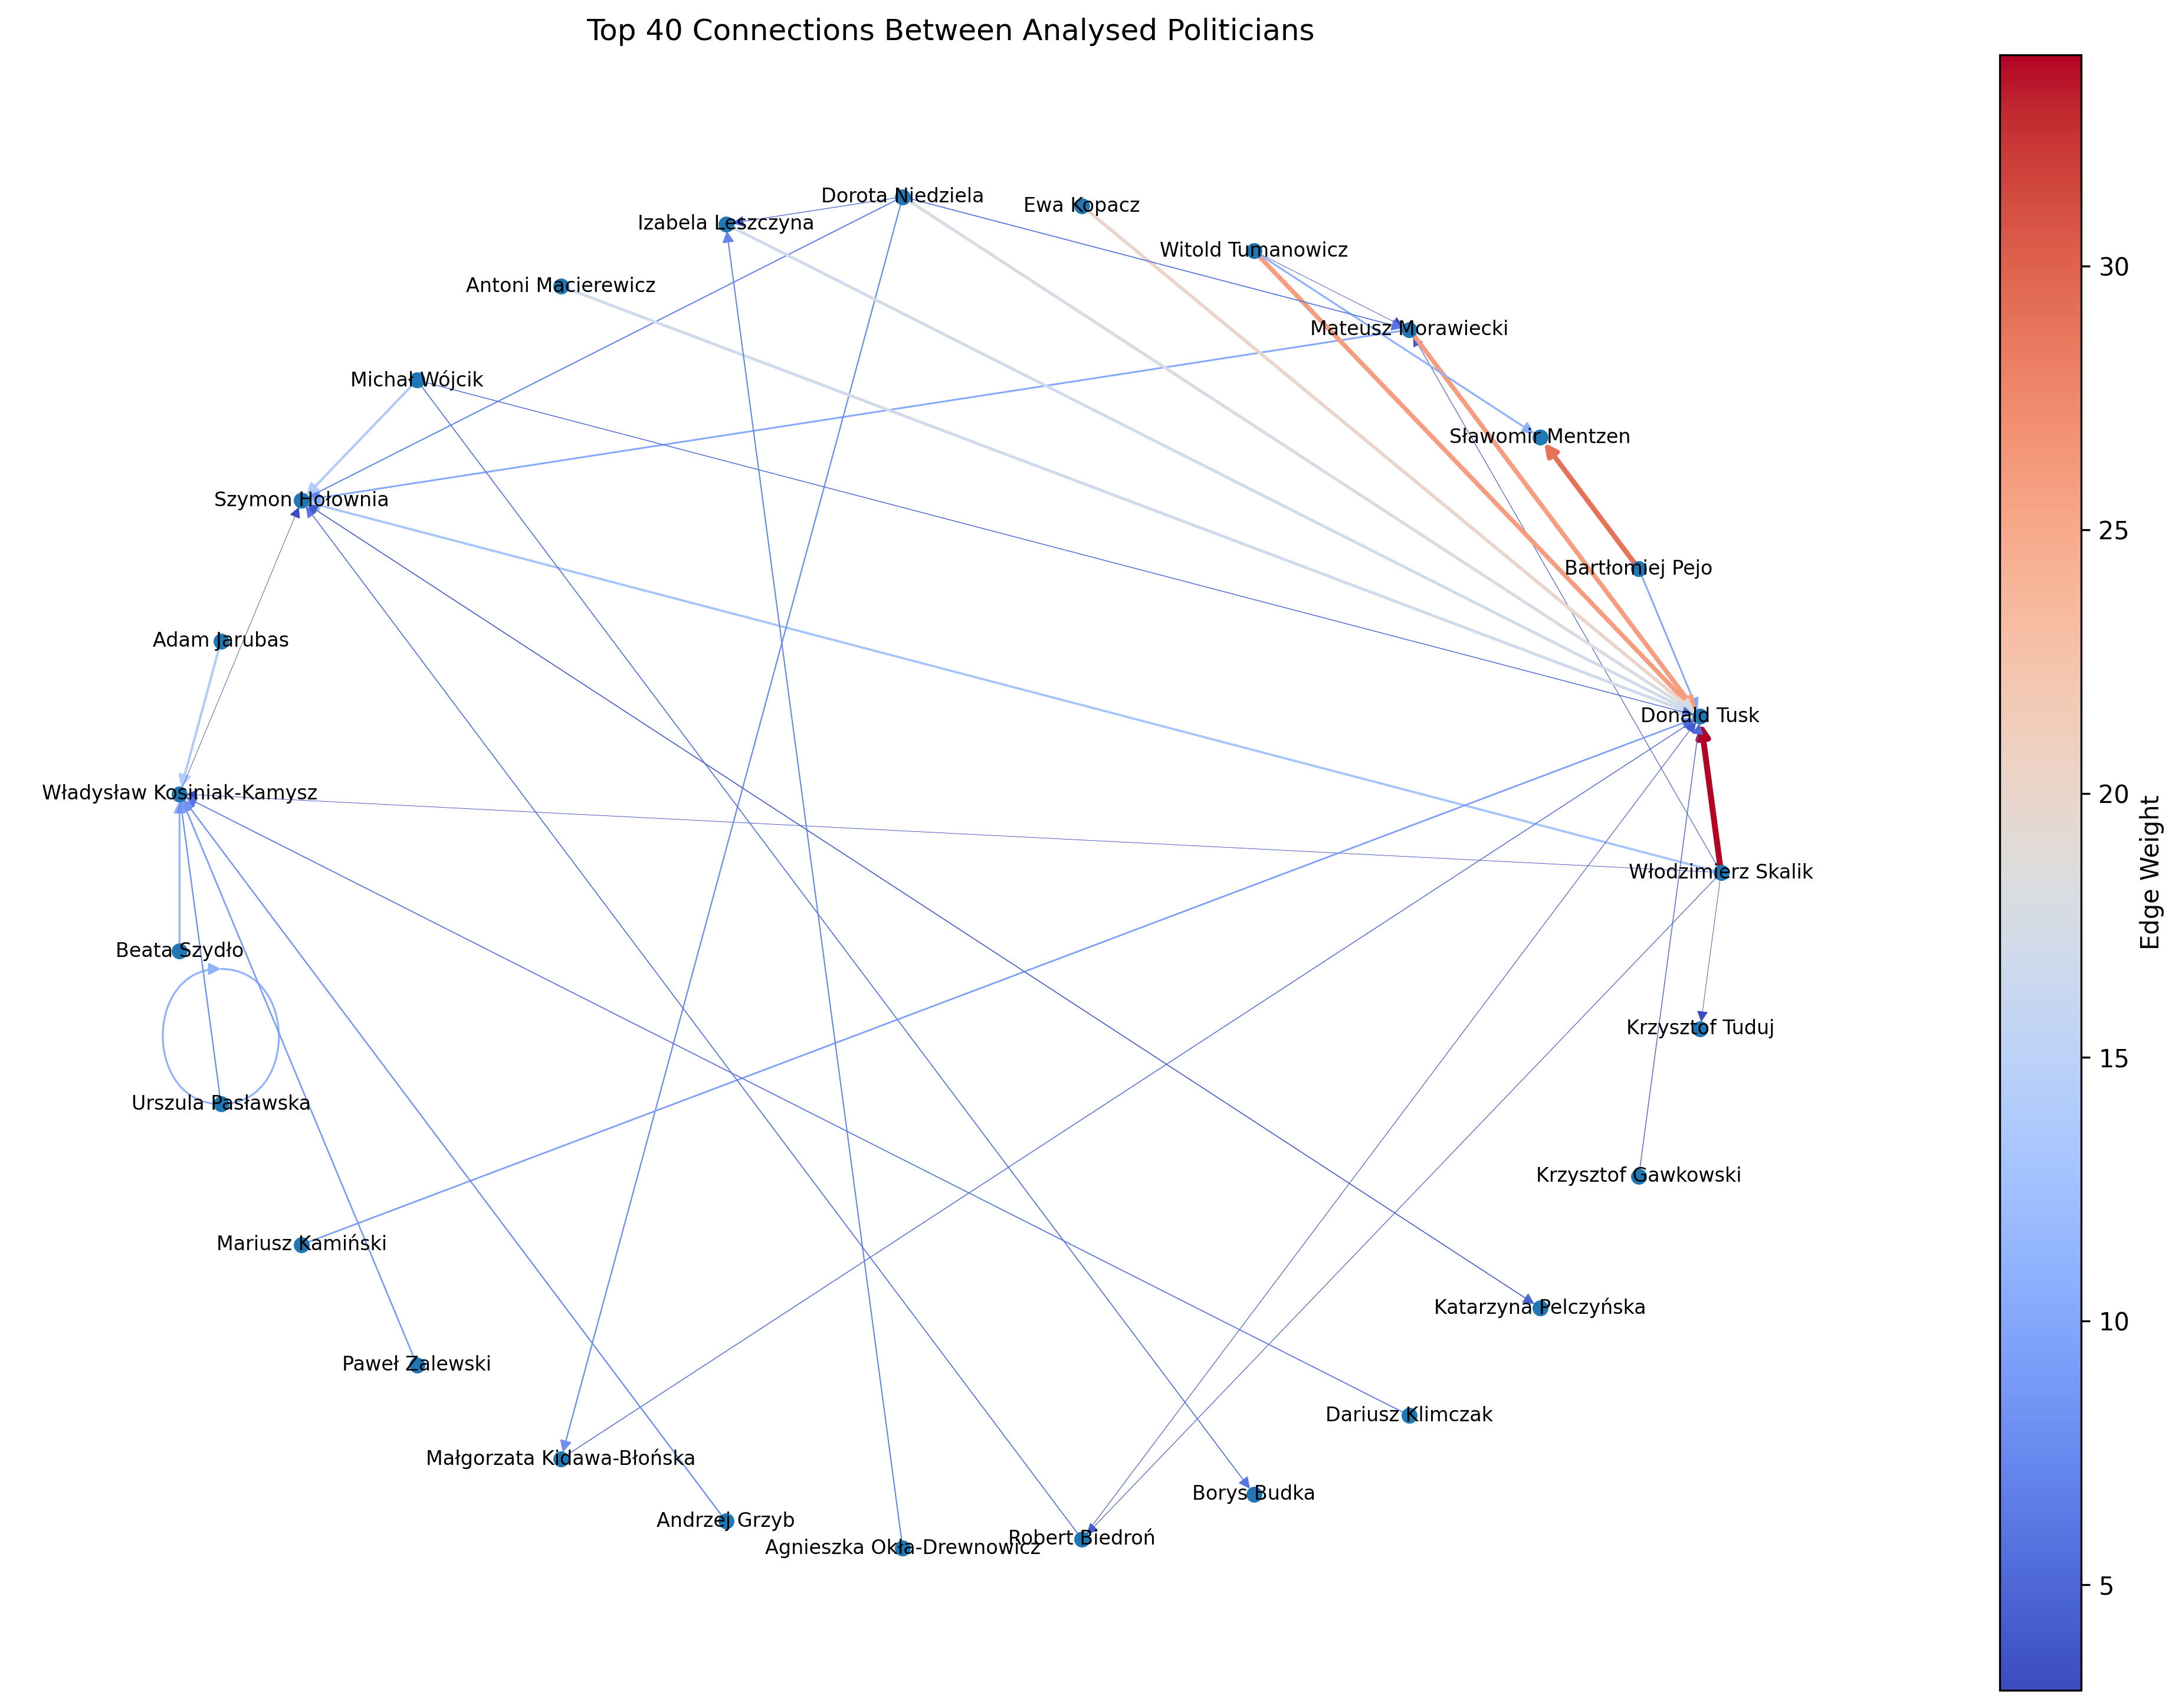

In [22]:
username_unique = mentions_exploded["username"].unique()
username_to_realname = {
    'bartlomiejpejo': 'Bartłomiej Pejo',
    'RobertBiedron': 'Robert Biedroń',
    'PatrykJaki': 'Patryk Jaki',
    'Kpelczynska': 'Katarzyna Pelczyńska',
    'OklaDrewnowicz': 'Agnieszka Okła-Drewnowicz',
    'KosiniakKamysz': 'Władysław Kosiniak-Kamysz',
    'mwojcik_': 'Michał Wójcik',
    'MorawieckiM': 'Mateusz Morawiecki',
    'SlawomirMentzen': 'Sławomir Mentzen',
    'Wlodek_Skalik': 'Włodzimierz Skalik',
    'BeataSzydlo': 'Beata Szydło',
    'WTumanowicz': 'Witold Tumanowicz',
    'KGawkowski': 'Krzysztof Gawkowski',
    'wlodekczarzasty': 'Włodzimierz Czarzasty',
    'Kaminski_M_': 'Mariusz Kamiński',
    'Macierewicz_A': 'Antoni Macierewicz',
    'elzbietawitek': 'Elżbieta Witek',
    'aga_buczynska': 'Agnieszka Buczyńska',
    'szymon_holownia': 'Szymon Hołownia',
    'DorotaNiedziela': 'Dorota Niedziela',
    'EwaKopacz': 'Ewa Kopacz',
    'Leszczyna': 'Izabela Leszczyna',
    'M_K_Blonska': 'Małgorzata Kidawa-Błońska',
    'bbudka': 'Borys Budka',
    'donaldtusk': 'Donald Tusk',
    'DariuszKlimczak': 'Dariusz Klimczak',
    'GrzybAndrzej': 'Andrzej Grzyb',
    'Hetman_K': 'Krzysztof Hetman',
    'JarubasAdam': 'Adam Jarubas',
    'Paslawska': 'Urszula Pasławska',
    'TudujKrzysztof': 'Krzysztof Tuduj',
    'ZalewskiPawel': 'Paweł Zalewski'
}
# Map the username and mentions columns to real names
mentions_exploded_real = mentions_exploded.copy() 
mentions_exploded_real['username'] = mentions_exploded_real['username'].map(username_to_realname)
mentions_exploded_real['mentions'] = mentions_exploded_real['mentions'].map(username_to_realname)
real_names_unique = [username_to_realname[username] for username in username_unique if username in username_to_realname]

mentions_exploded_real = mentions_exploded_real[
    mentions_exploded_real['username'].isin(real_names_unique) & 
    mentions_exploded_real['mentions'].isin(real_names_unique)
]

G_username = nx.DiGraph()
for _, row in mentions_exploded_real.dropna(subset=['mentions']).iterrows():
    if G_username.has_edge(row['username'], row['mentions']):
        G_username[row['username']][row['mentions']]['weight'] += 1
    else:
        G_username.add_edge(row['username'], row['mentions'], weight=1)

top_edges = sorted(G_username.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:40]
G_username = nx.DiGraph()
G_username.add_edges_from((u, v, {'weight': data['weight']}) for u, v, data in top_edges)

fig, ax = plt.subplots(figsize=(17, 12), dpi=300)
pos = nx.circular_layout(G_username)
weights = [data['weight'] for _, _, data in G_username.edges(data=True)]


scaled_weights = [w*0.07  for w in weights]

norm = mcolors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = plt.cm.coolwarm 
edge_colors = [cmap(norm(w)) for w in weights]

nx.draw(
    G_username, pos, with_labels=True, node_size=30, font_size=8, arrowsize=10, 
    width=scaled_weights, edge_color=edge_colors, ax=ax
)
plt.title('Top 40 Connections Between Analysed Politicians')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Edge Weight') 
plt.show()


In the graph above, we focused on politicians whose tweets we downloaded. 
The graph clearly shows that Donald Tusk is frequently mentioned in tweets, confirming our earlier findings. 
Additionally, Szymon Hołownia and Władysław Kosiniak-Kamysz are also commonly mentioned. 
Interestingly, Urszula Pasławska frequently mentions herself in her tweets.

## 5. Conclusions

1. The highest number of mentions are attributed to political parties. However, notable accounts such as Donald Tusk, Grzegorz Braun, Ministerstwo Spraw Zagranicznych, Szymon Hołownia, and Władysław Kosiniak-Kamysz are also frequently mentioned.

2. Different political parties mention different people and organizations in their tweets. Some parties, like Konfederacja and PO, mostly mention their own members in the top 10 mentions. In contrast, other parties like NL, PIS, and PL2050 frequently mention people from other parties. Additionally, PSL includes organizations like Polish Railways, NATO, and European Public Health in their top 10 mentions.

3. Urszula Pasławska frequently mentions herself in her tweets.